In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import scipy.sparse.linalg as sla

import scipy.sparse as sps

$u''+1000(1+x^2)u=f$ on $(-1,1)$

with $u(-1)=3$ and $u(1)=-3$.

In [2]:
def f1(x):
    return 0 * x

def f2(x):
    g1 = -np.pi**2 * np.sin(np.pi * x)
    g2 = 1000 * (1 + x**2) * (np.sin(np.pi * x) - 3 * x)
    return g1 + g2

f = f2
def solve_problem(n, f):

    x = np.linspace(-1, 1, n)
    h = x[1] - x[0]
    
    second_deriv = sps.diags([1,-2,1],
                             offsets=np.array([-1,0,1])+1,
                             shape=(n-2, n))/h**2
    
    factor = sps.diags([1000*(1 + x[1:]**2)],
                       offsets=[1],
                       shape=(n-2, n))
    
    A_int = second_deriv + factor
    
    A = sps.vstack([sps.coo_matrix(([1], ([0],[0])), shape=(1, n)),
                    A_int,
                    sps.coo_matrix(([1], ([0],[n-1])), shape=(1, n)),
                   ])
    A = sps.csr_matrix(A)
    
    rhs = f(x)
    rhs[0] = 3
    rhs[-1] = -3
    
    u = sla.spsolve(A, rhs)
    
    return u

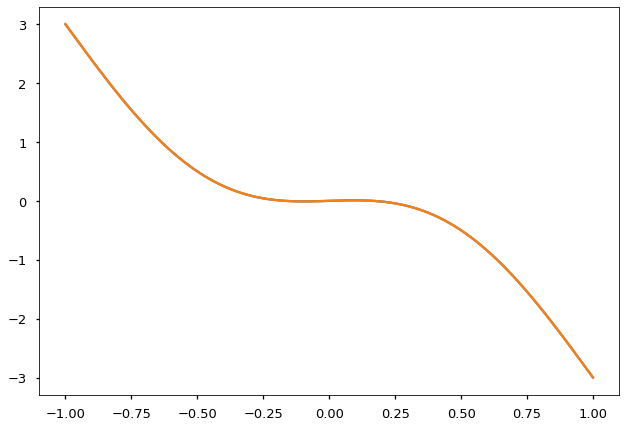

In [3]:
n = 100
x = np.linspace(-1, 1, n)
u = solve_problem(n, f)

plt.plot(x, u)
plt.plot(x, np.sin(np.pi * x) - 3 * x)

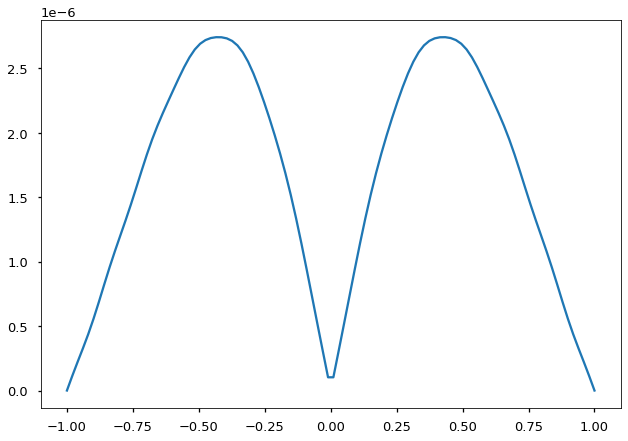

In [4]:
plt.plot(x, np.abs(u - (np.sin(np.pi * x) - 3 * x)))

In [7]:
ns = []
errors = []

for k in range(2, 15):
    n = 2**k
    
    x = np.linspace(-1, 1, n)
    u = solve_problem(n, f)
    
    error = np.abs(u - (np.sin(np.pi * x) - 3 * x))
    
    errors.append(np.max(error))
    ns.append(n)

Text(0, 0.5, 'error')

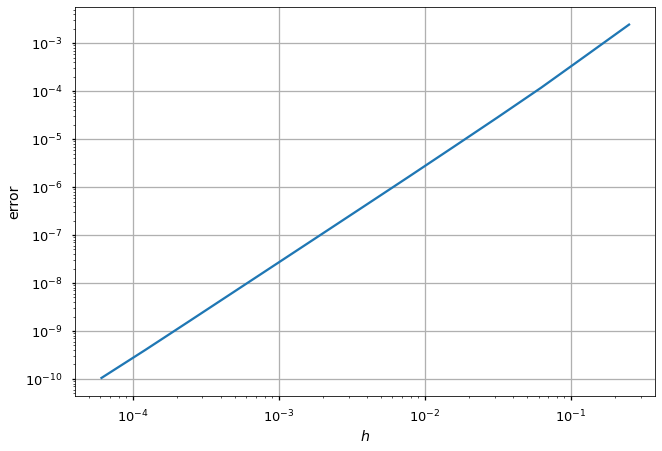

In [9]:
plt.loglog(1/np.array(ns), errors)
plt.grid(True)
plt.xlabel('$h$')
plt.ylabel('error')